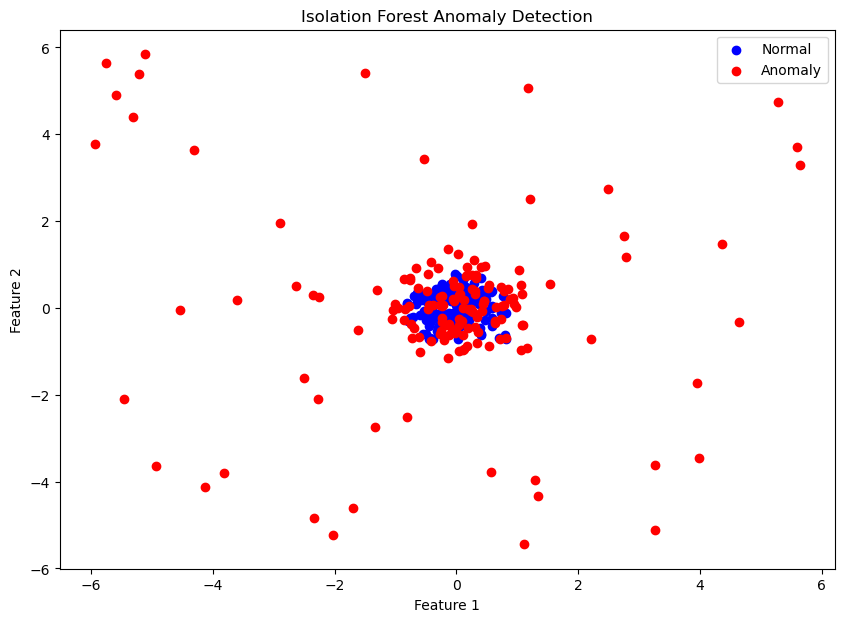

Number of detected anomalies: 162
Number of detected normal points: 138


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from isolation_forest import IsolationForest

# Generate sample data
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

X, _ = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
                  random_state=42, n_samples=n_inliers)

# Generate outliers
rng = np.random.RandomState(42)
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

# Fit Isolation Forest
clf = IsolationForest(contamination=outliers_fraction, random_state=42)
clf.fit(X)

# Predict anomalies
y_pred = clf.predict(X)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', label='Normal')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Anomaly')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f'Number of detected anomalies: {np.sum(y_pred == -1)}')
print(f'Number of detected normal points: {np.sum(y_pred == 1)}')